In [1]:
import torch

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from misc import simple_regret, get_problem_settings, bin_mean_cost, set_matplotlib_params

In [2]:
env = "hartmann"
algo = "mes"
kernels = ["downsampled","lin"]
budget = 100
bins = 60

In [3]:
data = torch.load("./results_exp_"+env+"_sf"+algo+"_"+kernels[0]+"/exp_"+env+"_sf"+algo+"_"+kernels[0]+"_results.pt", map_location=torch.device('cpu'))
li = [torch.clamp(x[0],0).cpu() for x in data]
mu11,sigma11,bins11 = bin_mean_cost(li,budget=budget,nbins=bins,idx_comp=0)

/Users/zhenzhu/Downloads/LRBMFO/misc.py:407: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/utils/tensor_new.cpp:278.)
  return torch.tensor([mean]).t(), torch.tensor([std]).t(), out_bins


In [4]:
data = torch.load("./results_exp_"+env+"_sf"+algo+"_"+kernels[1]+"/exp_"+env+"_sf"+algo+"_"+kernels[1]+"_results.pt", map_location=torch.device('cpu'))
li = [torch.clamp(x[0],0).cpu() for x in data]
mu12,sigma12,bins12 = bin_mean_cost(li,budget=budget,nbins=bins,idx_comp=0)

In [5]:
data = torch.load("./results_exp_"+env+"_mf"+algo+"_"+kernels[0]+"/exp_"+env+"_mf"+algo+"_"+kernels[0]+"_results.pt", map_location=torch.device('cpu'))
li = [torch.clamp(x[0],0).cpu() for x in data]
mu21,sigma21,bins21 = bin_mean_cost(li,budget=budget,nbins=bins,idx_comp=0)

In [6]:
data = torch.load("./results_exp_"+env+"_mf"+algo+"_"+kernels[1]+"/exp_"+env+"_mf"+algo+"_"+kernels[1]+"_results.pt", map_location=torch.device('cpu'))
li = [torch.clamp(x[0],0).cpu() for x in data]
mu22,sigma22,bins22 = bin_mean_cost(li,budget=budget,nbins=bins,idx_comp=0)

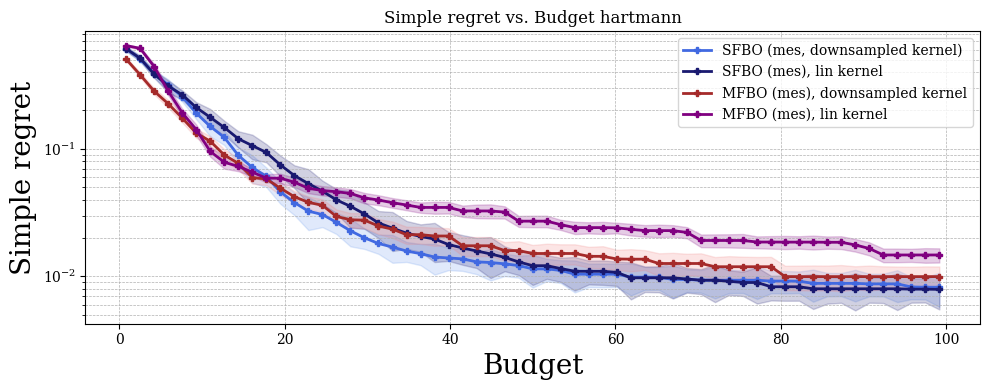

In [7]:
plt.figure(figsize=(10, 4))
plt.rc('font', family='serif')

plt.plot(bins11, mu11, '-P', color='royalblue', linewidth=2, markersize=4, label=f"SFBO ({algo}, {kernels[0]} kernel)")
plt.plot(bins12, mu12, '-P', color='midnightblue', linewidth=2, markersize=4, label=f"SFBO ({algo}), {kernels[1]} kernel")
plt.plot(bins21, mu21, '-P', color='brown', linewidth=2, markersize=4, label=f"MFBO ({algo}), {kernels[0]} kernel")
plt.plot(bins22, mu22, '-P', color='purple', linewidth=2, markersize=4, label=f"MFBO ({algo}), {kernels[1]} kernel")

plt.fill_between(bins11, 
                 [float(regret - std) for regret, std in zip(mu11, sigma11)], 
                 [float(regret + std) for regret, std in zip(mu11, sigma11)], 
                 color='cornflowerblue', alpha=0.2)
plt.fill_between(bins12, 
                 [float(regret - std) for regret, std in zip(mu12, sigma12)], 
                 [float(regret + std) for regret, std in zip(mu12, sigma12)], 
                 color='midnightblue', alpha=0.2)

plt.fill_between(bins21, 
                 [float(regret - std) for regret, std in zip(mu21, sigma21)], 
                 [float(regret + std) for regret, std in zip(mu21, sigma21)], 
                 color='lightcoral', alpha=0.2)
plt.fill_between(bins22, 
                 [float(regret - std) for regret, std in zip(mu22, sigma22)], 
                 [float(regret + std) for regret, std in zip(mu22, sigma22)], 
                 color='purple', alpha=0.2)

plt.xlabel("Budget", fontsize=20)
plt.ylabel("Simple regret", fontsize=20)
plt.yscale("log")

plt.title("Simple regret vs. Budget "+env)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()

MovieWriter imagemagick unavailable; using Pillow instead.


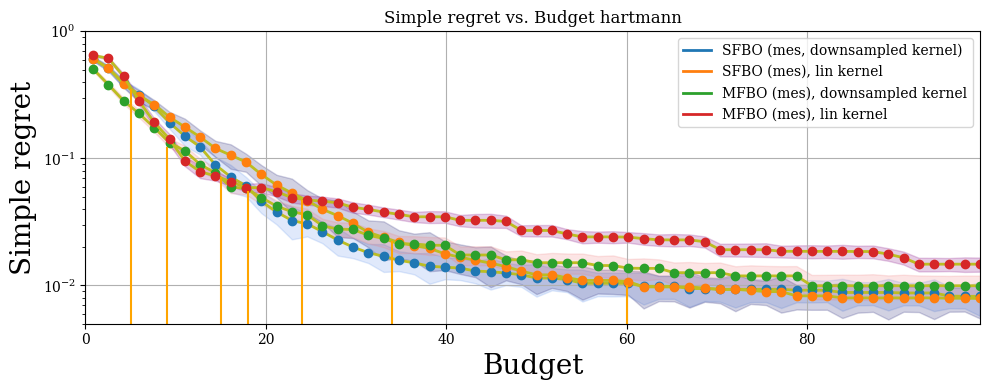

In [57]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation
import time
mu11_new = mu11.view(-1).tolist()
mu12_new = mu12.view(-1).tolist()
mu21_new = mu21.view(-1).tolist()
mu22_new = mu22.view(-1).tolist()
maxy = [max(mu11_new), max(mu12_new), max(mu21_new), max(mu22_new)]
# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 4))

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

# Create empty lines for the animation
line1, = ax.plot([], [], lw=2, label=f"SFBO ({algo}, {kernels[0]} kernel)")
points1, = ax.plot([], [], 'o', color=colors[0])

line2, = ax.plot([], [], lw=2, label=f"SFBO ({algo}), {kernels[1]} kernel")
points2, = ax.plot([], [], 'o', color=colors[1])

line3, = ax.plot([], [], lw=2,label=f"MFBO ({algo}), {kernels[0]} kernel")
points3, = ax.plot([], [], 'o', color=colors[2])

line4, = ax.plot([], [], lw=2,label=f"MFBO ({algo}), {kernels[1]} kernel")
points4, = ax.plot([], [], 'o', color=colors[3])

# Set limits for the plot
ax.set_xlim(0, max(bins11))
ax.set_ylim(0.005, 1)
# Add grid lines
ax.grid(True)
# Set y-axis to log scale
ax.set_yscale('log')

ax.fill_between(bins11, 
                 [float(regret - std) for regret, std in zip(mu11, sigma11)], 
                 [float(regret + std) for regret, std in zip(mu11, sigma11)], 
                 color='cornflowerblue', alpha=0.2)
ax.fill_between(bins12, 
                 [float(regret - std) for regret, std in zip(mu12, sigma12)], 
                 [float(regret + std) for regret, std in zip(mu12, sigma12)], 
                 color='midnightblue', alpha=0.2)

ax.fill_between(bins21, 
                 [float(regret - std) for regret, std in zip(mu21, sigma21)], 
                 [float(regret + std) for regret, std in zip(mu21, sigma21)], 
                 color='lightcoral', alpha=0.2)
ax.fill_between(bins22, 
                 [float(regret - std) for regret, std in zip(mu22, sigma22)], 
                 [float(regret + std) for regret, std in zip(mu22, sigma22)], 
                 color='purple', alpha=0.2)

# Initialization function
def init():
    line1.set_data([], [])
    line2.set_data([], [])
    line3.set_data([], [])
    line4.set_data([], [])
    return line1, line2,line3,line4,

# Animation function
def animate(i):
    line1.set_data(bins11[:i+1], mu11_new[:i+1])
    color_index = i % len(colors)
    line1.set_color(colors[color_index])
    points1.set_data(bins11[:i+1], mu11_new[:i+1])

    line2.set_data(bins12[:i+1], mu12_new[:i+1])
    color_index = i % len(colors)
    line2.set_color(colors[color_index])
    points2.set_data(bins12[:i+1], mu12_new[:i+1])

    line3.set_data(bins21[:i+1], mu21_new[:i+1])
    color_index = i % len(colors)
    line3.set_color(colors[color_index])
    points3.set_data(bins21[:i+1], mu21_new[:i+1])

    line4.set_data(bins22[:i+1], mu22_new[:i+1])
    color_index = i % len(colors)
    line4.set_color(colors[color_index])
    points4.set_data(bins22[:i+1], mu22_new[:i+1])
        # Pause at a certain x-value for 20 seconds
        # Update fill between lines
    return line1, points1, line2, points2, line3, points3, line4, points4, 

# Create animation
anim = animation.FuncAnimation(fig, animate, frames=len(bins11), init_func=init, interval=2)

crossx = [5, 9, 15, 18, 24, 34, 60]
plt.axvline(x=crossx[0], color='orange', ymax=0.8, linestyle='-')
plt.axvline(x=crossx[1], color='orange', ymax=0.6,linestyle='-')
plt.axvline(x=crossx[2], color='orange', ymax=0.5,linestyle='-')
plt.axvline(x=crossx[3], color='orange', ymax=0.45,linestyle='-')
plt.axvline(x=crossx[4], color='orange', ymax=0.42,linestyle='-')
plt.axvline(x=crossx[5], color='orange', ymax=0.28,linestyle='-')
plt.axvline(x=crossx[6], color='orange', ymax=0.13,linestyle='-')

plt.xlabel("Budget", fontsize=20)
plt.ylabel("Simple regret", fontsize=20)

plt.title("Simple regret vs. Budget "+env)
#plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.tight_layout()
anim.save('simple_regret_vs_budget.gif', writer='imagemagick')
plt.show()


#plt.yscale("log")